# Seaborn plots

In [4]:
# Hide all warnings
import warnings
warnings.simplefilter('ignore')

# Data
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2, rc={'figure.figsize':(16,9)})

# Show plots directly within Jupyter Out
%matplotlib inline

In [284]:
# https://www.kaggle.com/c/titanic/download/train.csv
df = pd.read_csv('../../day_1/2_seminar_basics/data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [161]:
df.shape

(891, 12)

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Heatmap

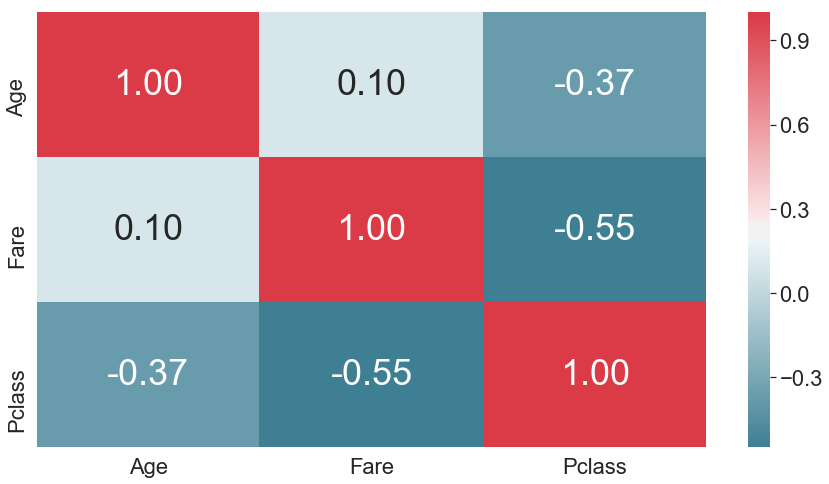

In [156]:
f, ax = plt.subplots(figsize=(15, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = df[['Age', 'Fare', 'Pclass']].corr()

sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f', annot_kws={"size": 36});

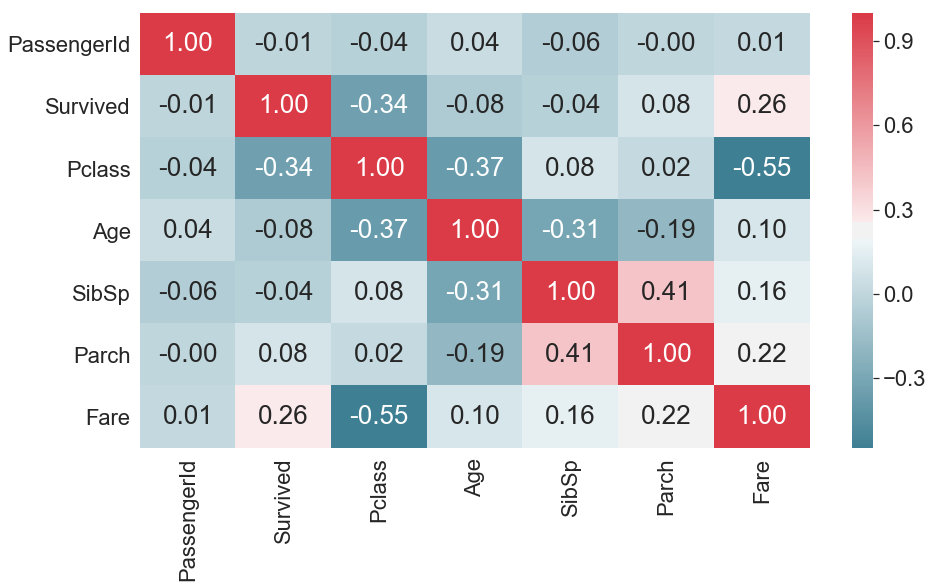

In [150]:
# TODO: plot correlations between all variables


Heatmap ignores non-numerical data, so you don't see _Sex_ variable here.

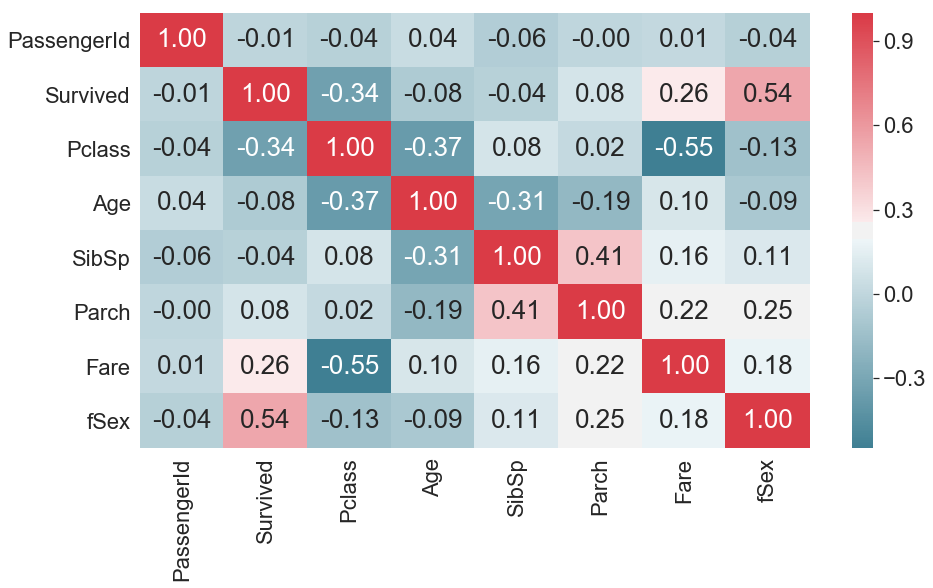

In [166]:
# TODO: add new numerical variable fSex encoded variable Sex and replot heatmap
# use e.g. df['Sex'].factorize()

df['fSex'] = 

Variable _Survived_ is correlated to _fSex_, _Fare_ and is anticorrelated to _Pclass_, but _Pclass_ depends on _Fare_ obviously.

## How much missing data we have

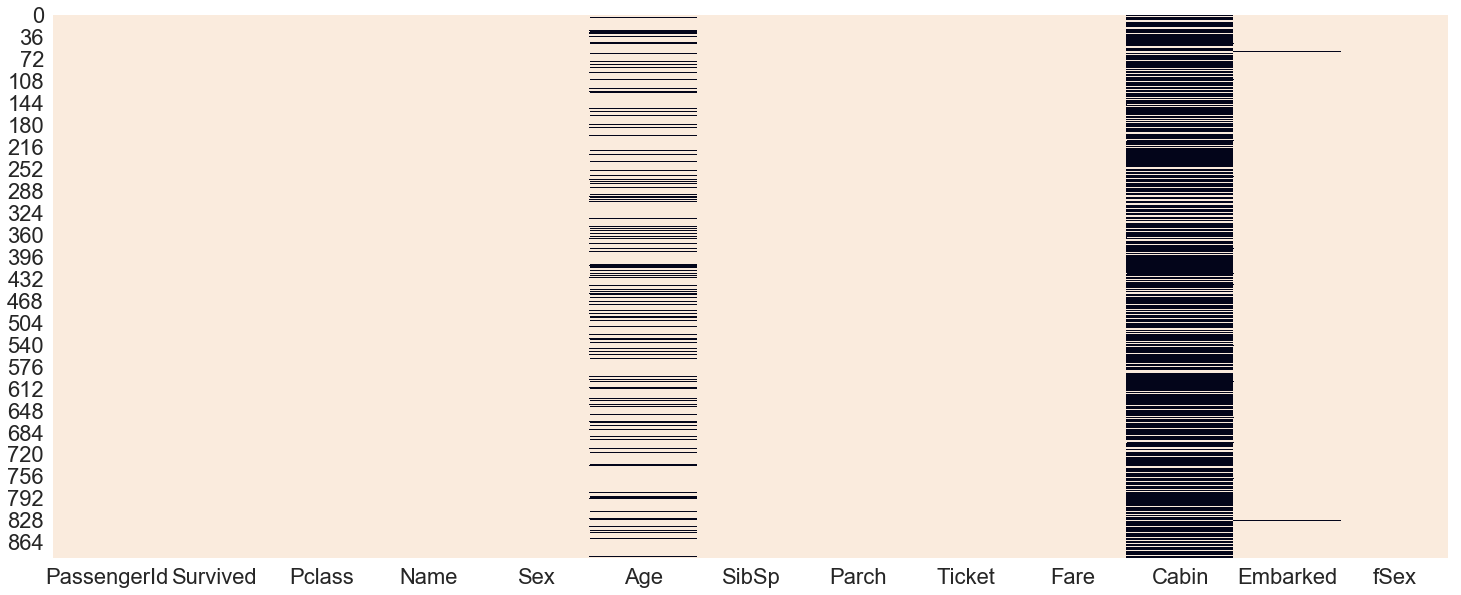

In [172]:
fig, ax = plt.subplots(figsize=(25,10))
sns.heatmap(df.notnull(), cbar=False);

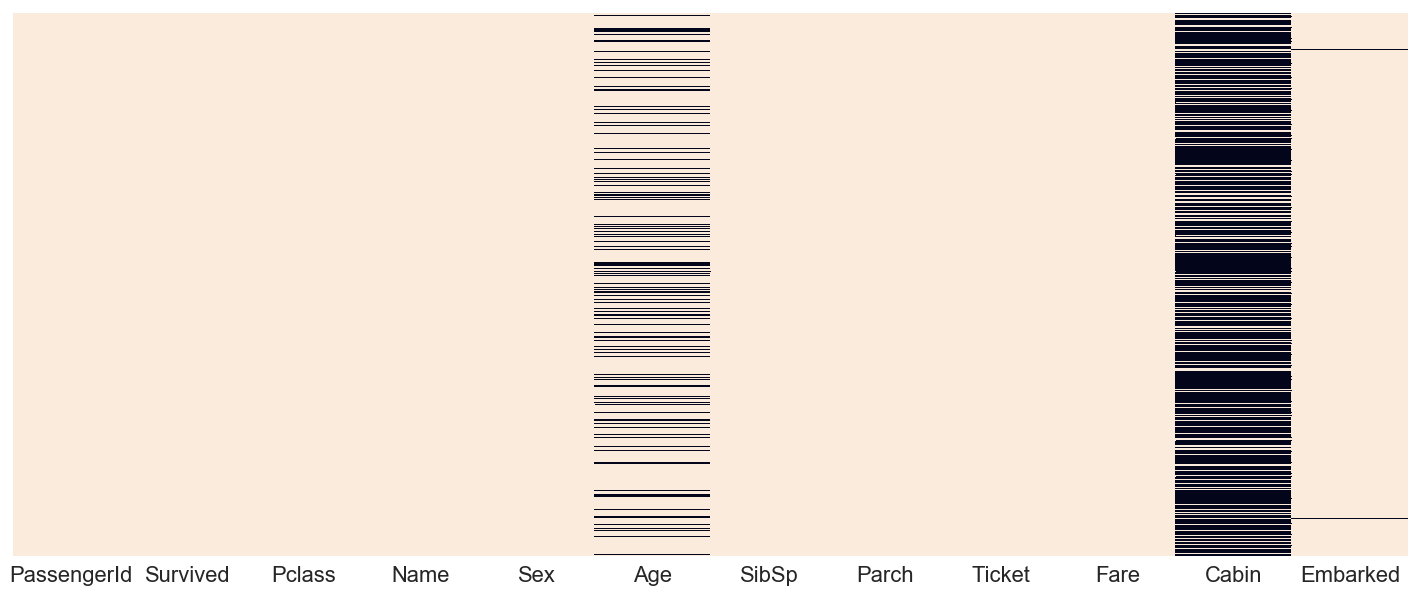

In [90]:
fig, ax = plt.subplots(figsize=(25,10))
sns_heatmap = sns.heatmap(df.notnull(), yticklabels=False, cbar=False)

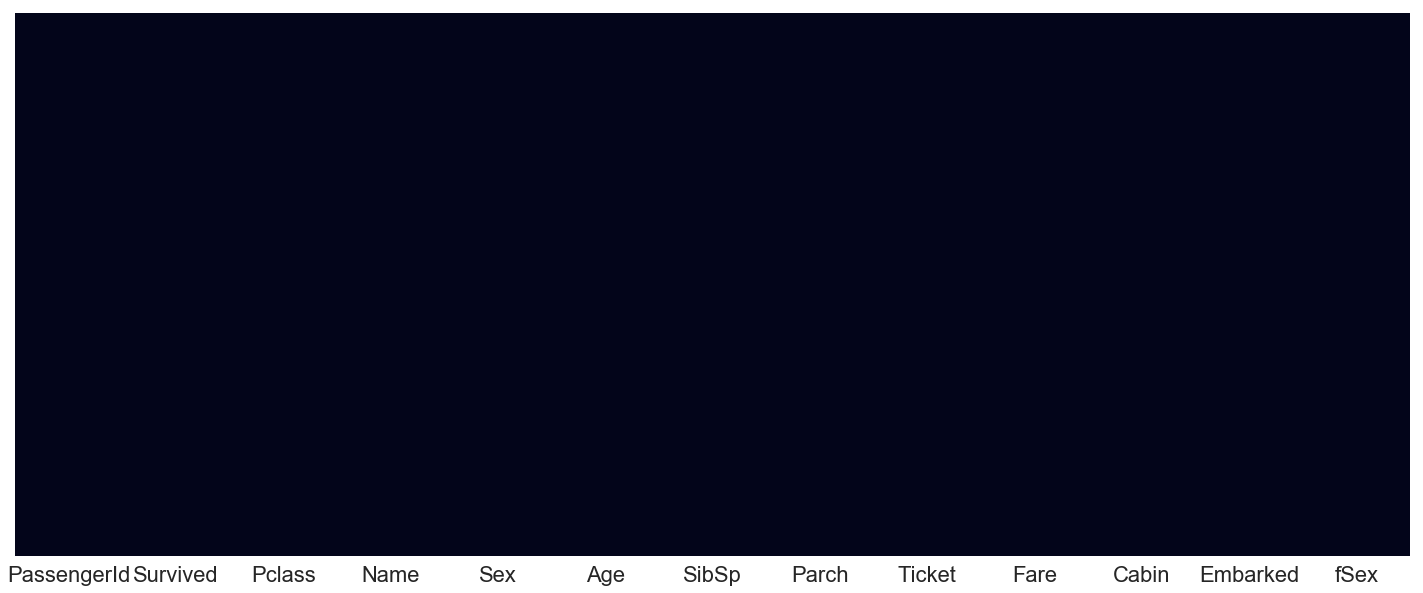

In [175]:
fig, ax = plt.subplots(figsize=(25,10))
df_clean = df.dropna()
sns_heatmap = sns.heatmap(df_clean.isnull(), yticklabels=False, cbar=False)

In [107]:
# TODO: What fraction of data (observations) is rested after cleaning?
# use df.shape and df_clean.shape


0.2053872053872054

0.2053872053872054 - not so much.

Let's drop only not sparse columns _Age_ and _Embarked_ and exclude _Cabin_ column at all

In [128]:
df_clean = df.drop('Cabin', axis=1).dropna(subset=['Age', 'Embarked'])
df_clean.shape

(712, 11)

# Countplot (bar plot counts of variable values)

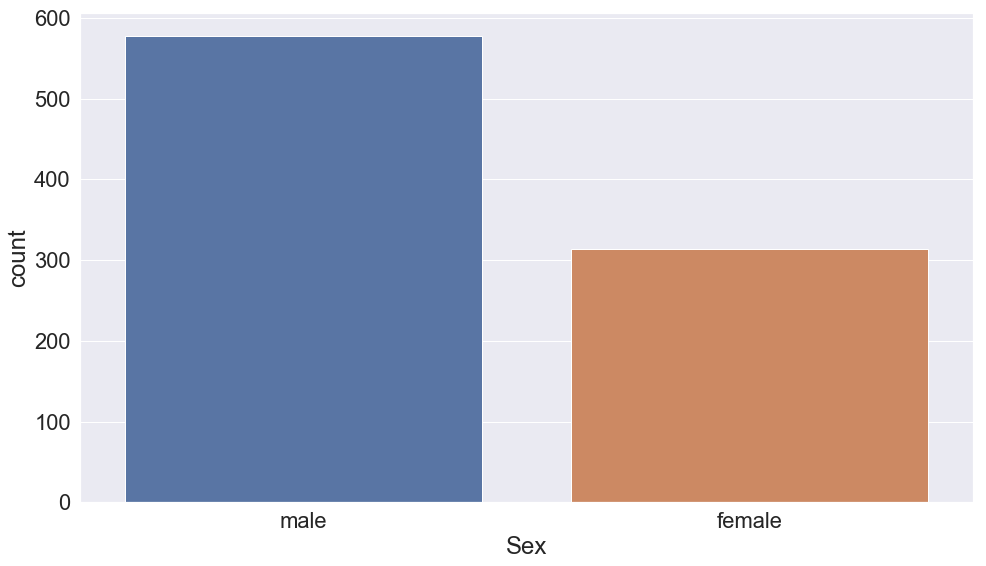

In [186]:
sns.set(font_scale=2, rc={'figure.figsize':(16,9)})
sns.countplot(df['Sex']);

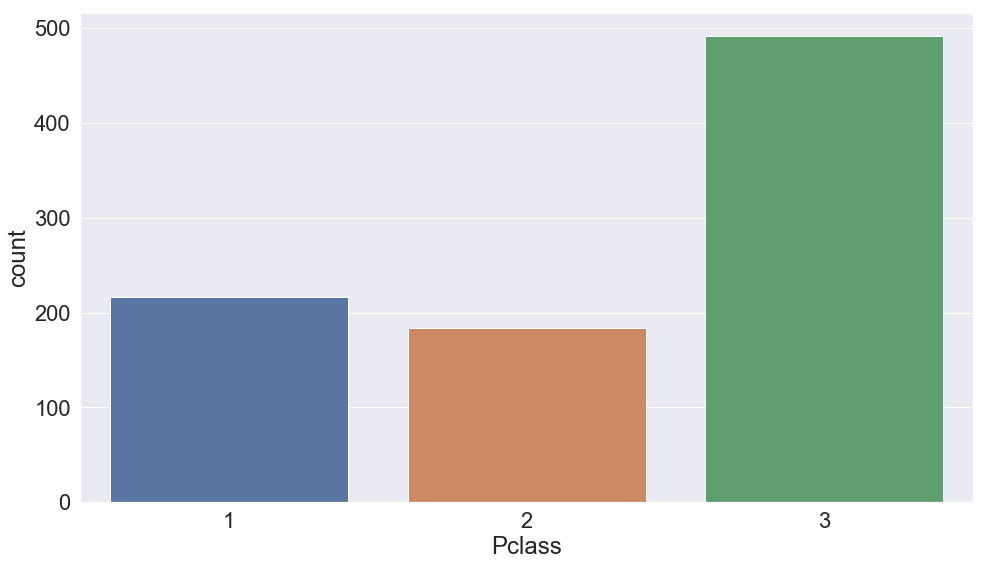

In [187]:
sns.set(font_scale=2, rc={'figure.figsize':(16,9)})
sns.countplot(df['Pclass']);

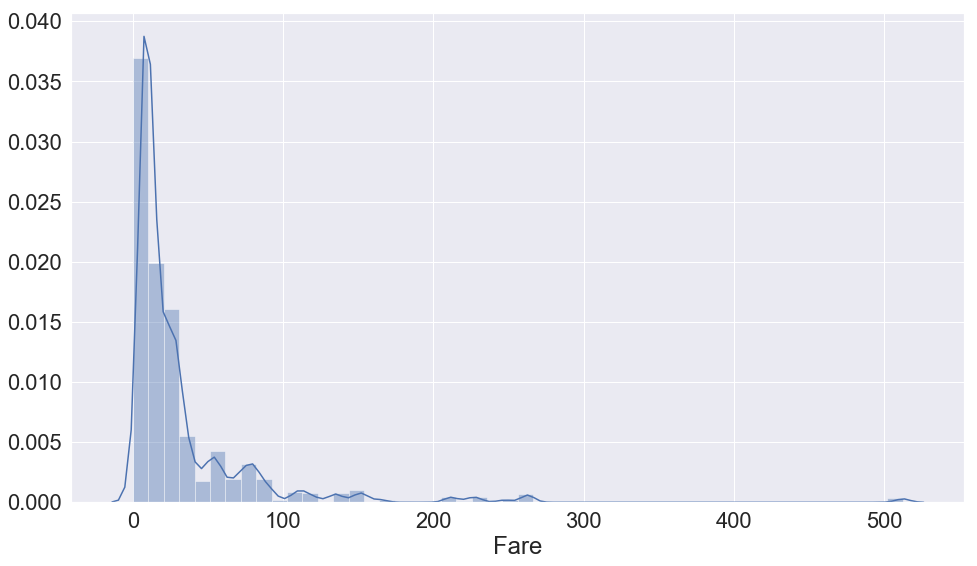

In [195]:
sns.distplot(df['Fare']);

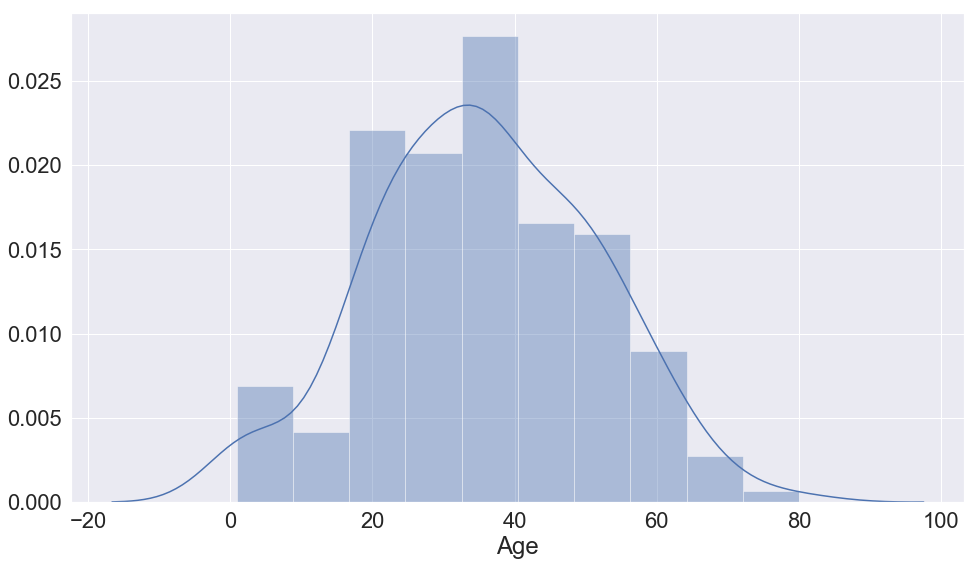

In [230]:
sns.distplot(df_clean['Age']);

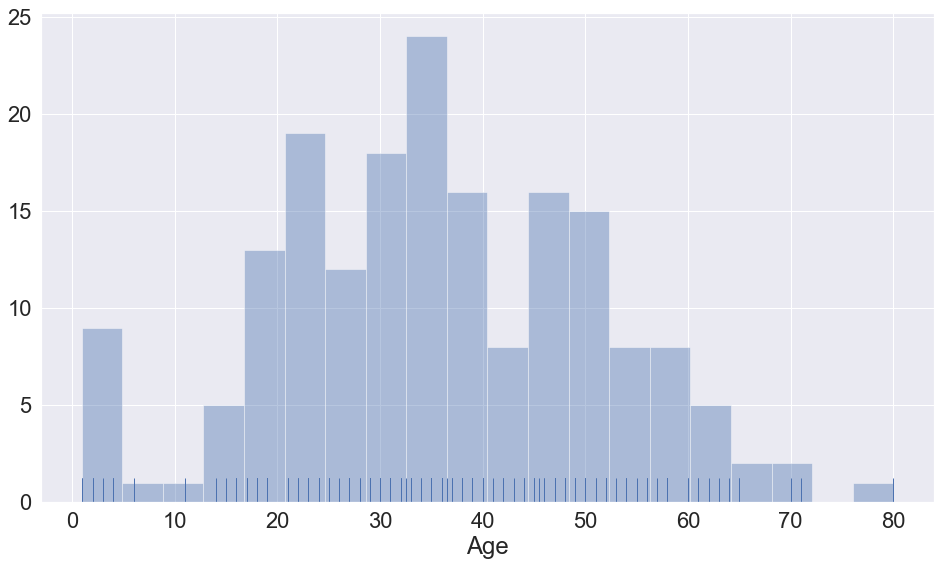

In [231]:
sns.distplot(df_clean['Age'], bins=20, kde=False, rug=True);

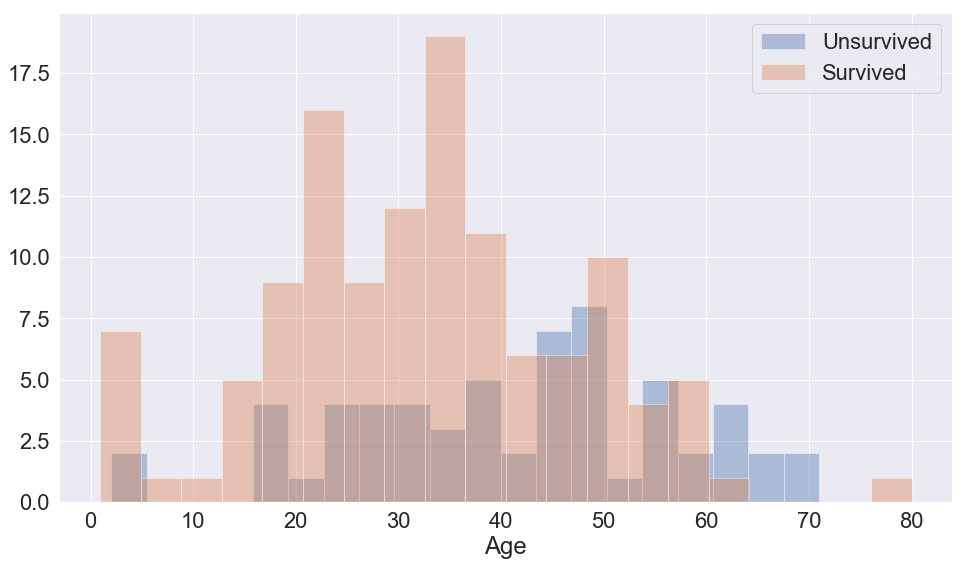

In [213]:
sns.distplot(df_clean['Age'][df['Survived'] == 0], bins=20, kde=False, label='Unsurvived')
sns.distplot(df_clean['Age'][df['Survived'] == 1], bins=20, kde=False, label='Survived')
plt.legend();

In [221]:
df['Pclass'].unique()

array([3, 1, 2])

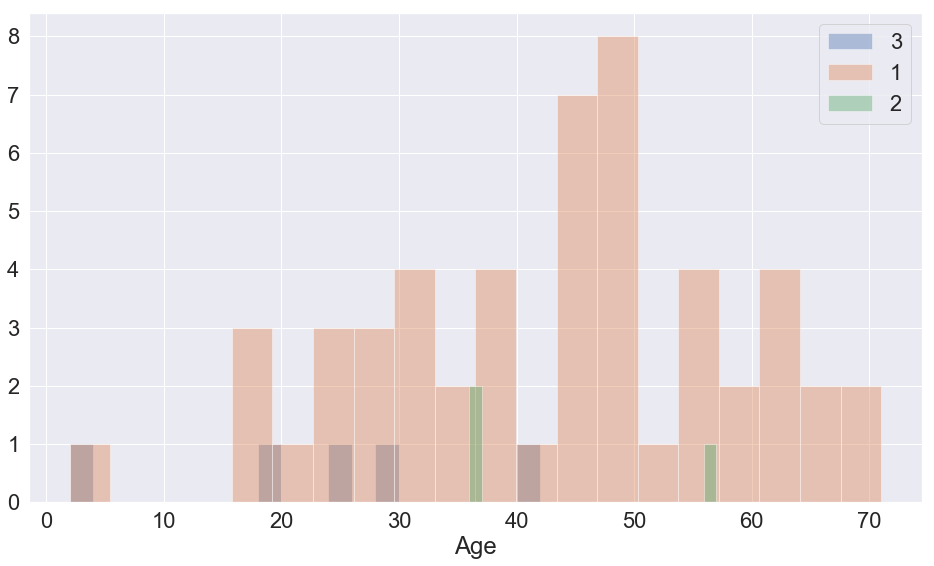

In [235]:
# How the Age of unsurvived passengers depends on Pclass?
# TODO: Plot histograms of Age for each pClass of unsurvived to see how it is distributed
# use filter rule (df['Survived'] == 0) & (df['Pclass'] == pclass)


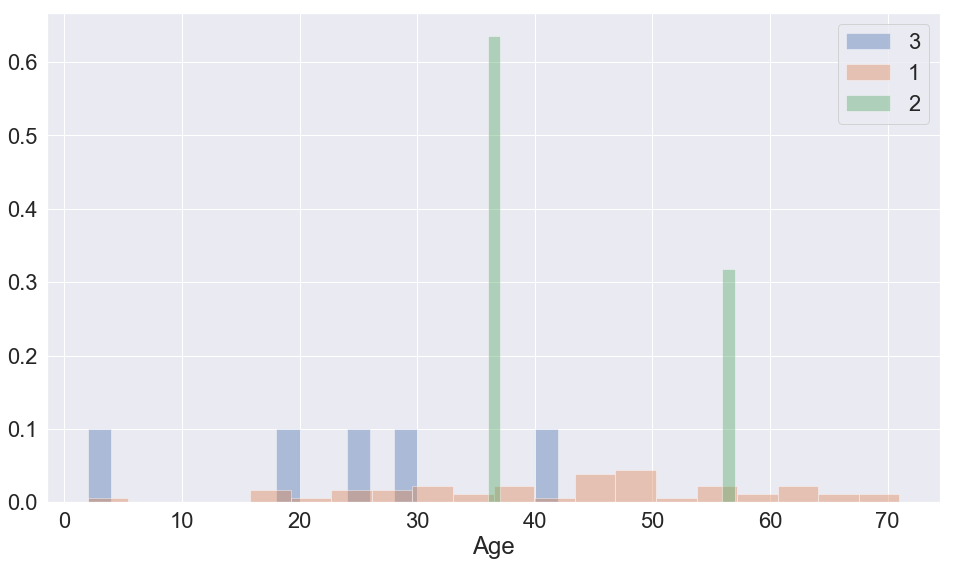

In [240]:
# TODO: Enable norm_hist = True


### Hometask

What the class of passenges is the most unsurvived?

# Box vs violin plots

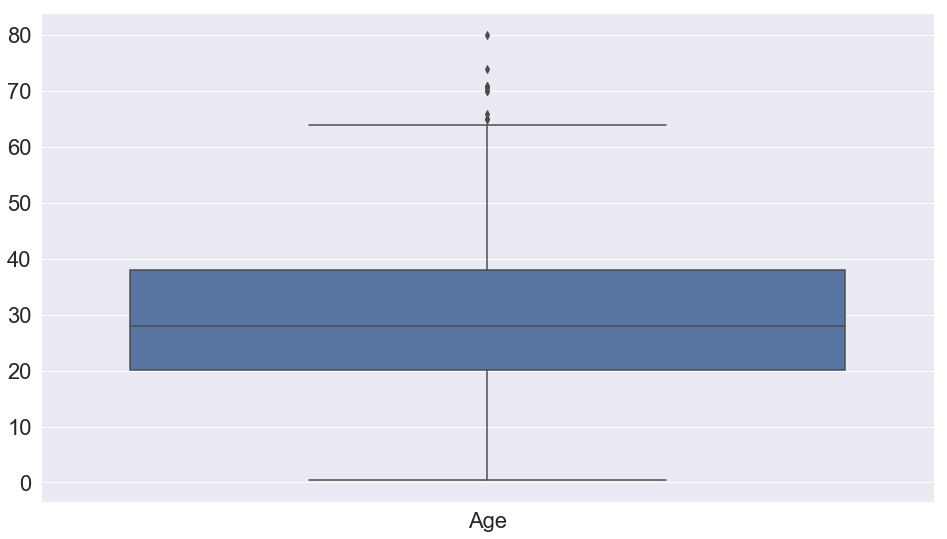

In [269]:
sns.boxplot(data=df[['Age']]);

Change orientation

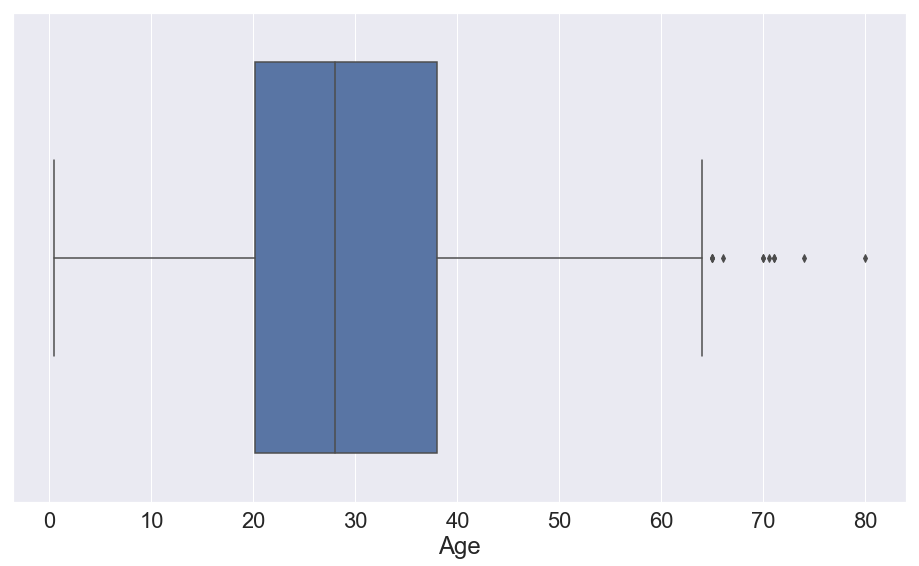

In [274]:
sns.boxplot(x='Age', data=df[['Age']]);

Violinplot draws a combination of boxplot and kernel density estimate.

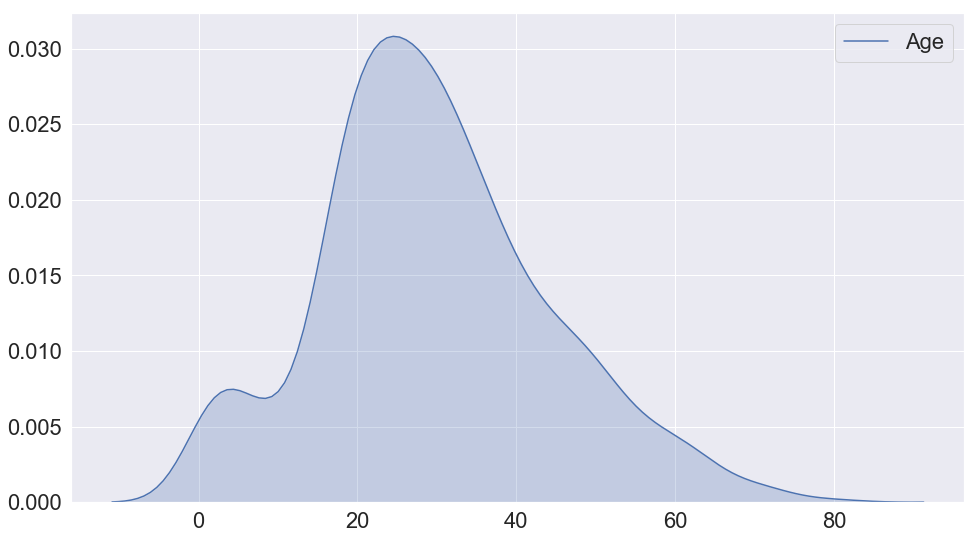

In [295]:
sns.kdeplot(data=df['Age'], shade=True);

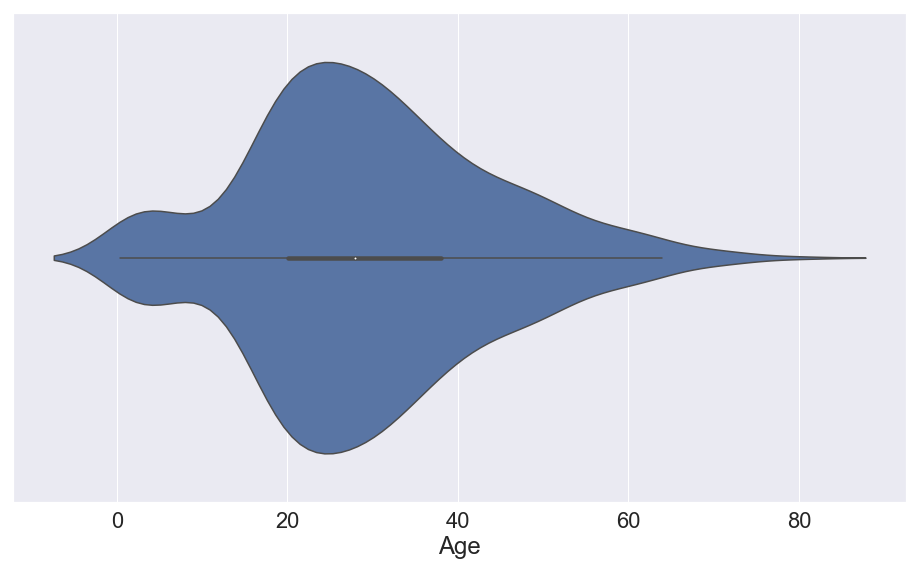

In [279]:
sns.violinplot(x='Age', data=df[['Age']]);

# Jointplot

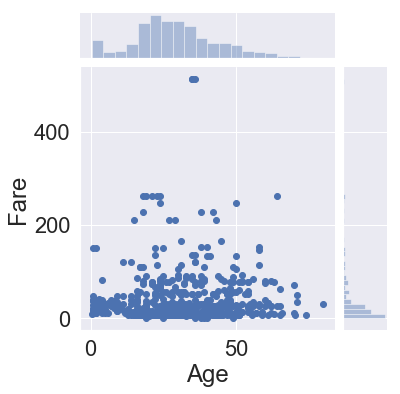

In [301]:
sns.jointplot(data=df, x='Age', y='Fare');

---
# Homework

Download [sample dataset](https://github.com/oreillymedia/doing_data_science/raw/master/dds_datasets.zip). Unzip it, unzip `dds_datasets/dds_ch2_rollingsales.zip`. Load Bronx in dataframe:

In [7]:
df = pd.read_excel('dds_datasets/dds_ch2_rollingsales/rollingsales_bronx.xls', skiprows=4)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART MENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY HOMES,1,3028,25,,A5,412 EAST 179TH STREET,,...,1,0,1,1842,2048,1901,1,A5,355000,2013-07-08
1,2,BATHGATE,01 ONE FAMILY HOMES,1,3039,28,,A1,2329 WASHINGTON AVENUE,,...,1,0,1,1103,1290,1910,1,A1,474819,2013-05-20
2,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,39,,A1,2075 BATHGATE AVENUE,,...,1,0,1,1986,1344,1899,1,A1,210000,2013-03-12
3,2,BATHGATE,01 ONE FAMILY HOMES,1,3046,52,,A1,2047 BATHGATE AVENUE,,...,1,0,1,2329,1431,1901,1,A1,343116,2013-07-01
4,2,BATHGATE,02 TWO FAMILY HOMES,1,2900,61,,S2,406 EAST TREMONT AVENUE,,...,2,1,3,1855,4452,1931,1,S2,0,2012-08-31


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 21 columns):
BOROUGH                           5268 non-null int64
NEIGHBORHOOD                      5268 non-null object
BUILDING CLASS CATEGORY           5268 non-null object
TAX CLASS AT PRESENT              5268 non-null object
BLOCK                             5268 non-null int64
LOT                               5268 non-null int64
EASE-MENT                         5268 non-null object
BUILDING CLASS AT PRESENT         5268 non-null object
ADDRESS                           5268 non-null object
APART
MENT
NUMBER                 5268 non-null object
ZIP CODE                          5268 non-null int64
RESIDENTIAL UNITS                 5268 non-null int64
COMMERCIAL UNITS                  5268 non-null int64
TOTAL UNITS                       5268 non-null int64
LAND SQUARE FEET                  5268 non-null int64
GROSS SQUARE FEET                 5268 non-null int64
YEAR BUILT            

## Regression plot within jointplot

You can call just `regplot()`

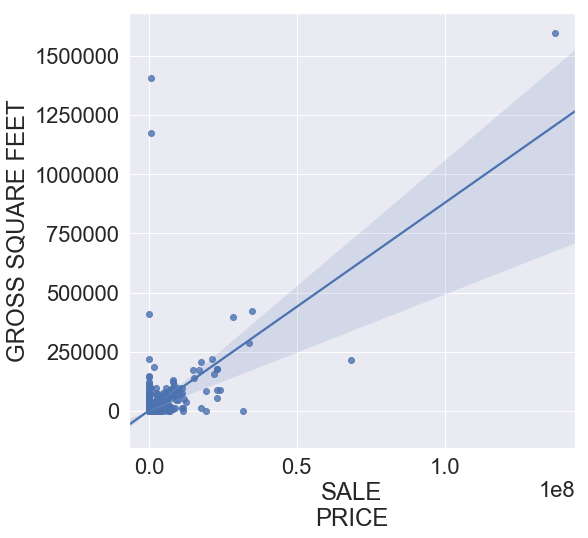

In [66]:
f, ax = plt.subplots(figsize=(8, 8))
jnt = sns.regplot(data=df, x='SALE\nPRICE', y='GROSS SQUARE FEET')

But try to understand the anatomy of `jointplot()`

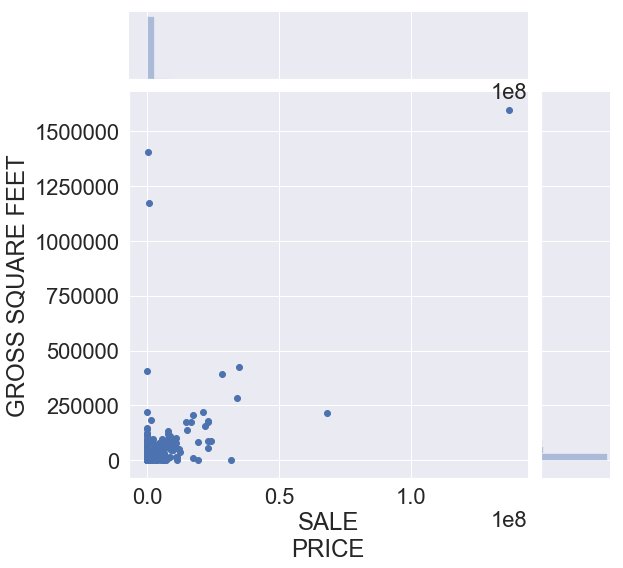

In [36]:
sns.jointplot(data=df, x='SALE\nPRICE', y='GROSS SQUARE FEET', height=8);

There are three subplots (`axes`-objects) within jointplot:

In [28]:
[member for member in filter(lambda m: '__' not in m, dir(jnt))]

['annotate',
 'ax_joint',
 'ax_marg_x',
 'ax_marg_y',
 'fig',
 'plot',
 'plot_joint',
 'plot_marginals',
 'savefig',
 'set_axis_labels',
 'x',
 'y']

Do the following:
* Filter outliers by 0.5e8 for x and by 6e5 for y
* Plot regression line onto scatterplot (pass certain parameter to `jointplot`)
* Disable tick labels of both X&Y `distplot`s to hide "1e8" (get x axis from x distplot (marginal plot) and use `set_visible()`)
* Low case both labels of scatterplot axis X&Y (e.g. `'GROSS' -> 'Gross'`)
* Pad label of scatterplot axis Y

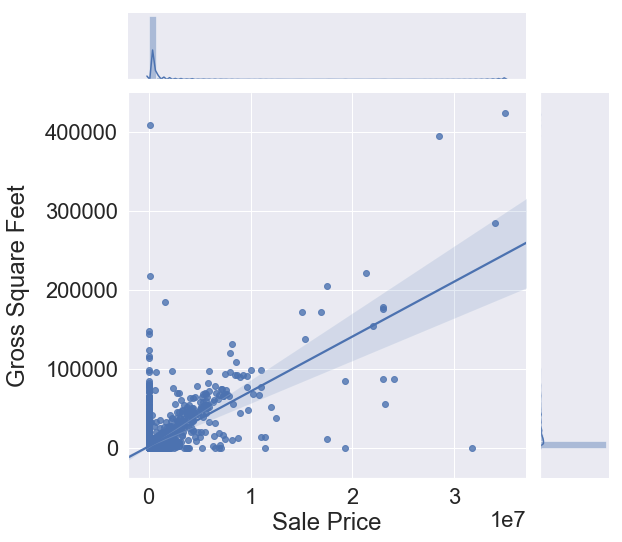

In [160]:
# Your code here

Optional:
* Replace format of axis Y to exponential (get y axis from y distplot and use its method `set_major_formatter(matplotlib.tickerFuncFormatter(lambda string, position: ...))`)

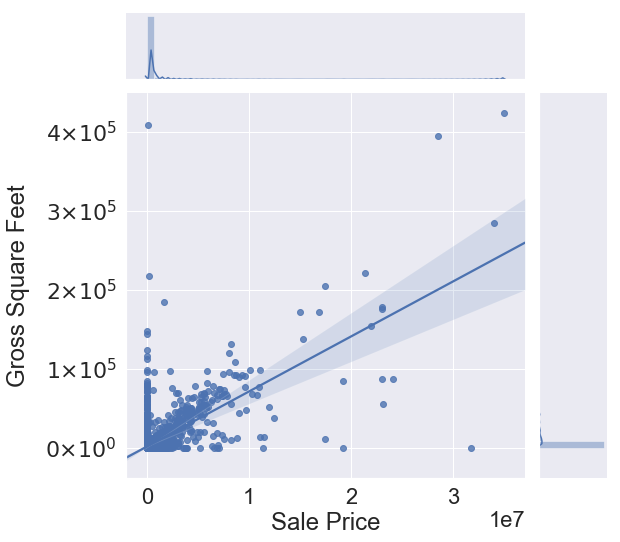

In [156]:
# Your code here